# Influence of vocabulary size

In [1]:
import os
import sys
import gensim
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style="darkgrid")
sys.path.append(os.path.dirname(os.getcwd()))

from data import load_data
from emb import load_emb_model

Using TensorFlow backend.


In [2]:
# Load the word2vec model
emb_model = load_emb_model('../../vectors/GoogleNews-vectors-negative300.bin')

In [3]:
# Load the dataset
_, (tokenizer, _) = load_data('../data/stanford_sentiment_binary_train.tsv.gz')

In [4]:
print("there is {} words in dataset".format(len(tokenizer.word_index)))

there is 13295 words in dataset


In [5]:
words = np.zeros(shape=(len(emb_model.index2word),), dtype=np.int)
oov = 0
for word in tokenizer.index_word.values():
    try:
        words[emb_model.vocab[word].index] = 1
    except KeyError:
       oov += 1
print("words in vocab:\t\t{}".format(np.sum(words)))
print("words out of vocab\t{}".format(oov))
print("all words:\t\t{}".format(np.sum(words) + oov))

words in vocab:		12282
words out of vocab	1013
all words:		13295


In [6]:
words_in = np.array(list(itertools.accumulate(words)))
words_out = np.full((words_in.shape), len(tokenizer.word_index)) - words_in

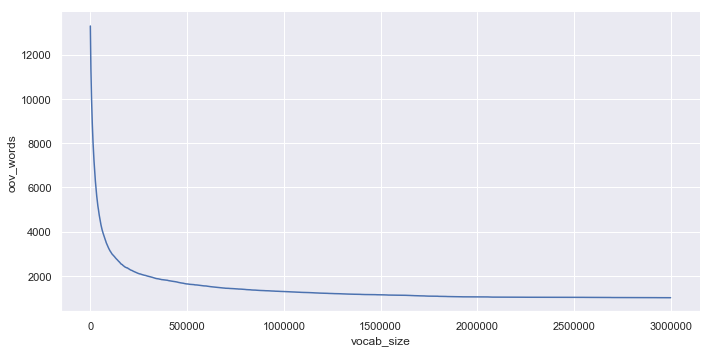

In [20]:
df = pd.DataFrame({
    'oov_words': words_out[::1000],
    'vocab_size': list(range(0, len(emb_model.vocab), 1000))
})

sns.relplot(y='oov_words', x='vocab_size', data=df, kind='line', aspect=2)